### Convolutional Neural Network
Using EfficientNetV2

#### Imports

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetV2B1
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

#### Load CIFAR-10 data

In [3]:
(x_train_val, y_train_val), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


#### Normalize images

In [4]:
x_train_val = x_train_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### Training and validation split

In [5]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.2, random_state=1234, stratify=y_train_val
)

#### One-hot encoding for labels

In [6]:
y_train_one_hot = to_categorical(y_train, 10)
y_val_one_hot = to_categorical(y_val, 10)
y_test_one_hot = to_categorical(y_test, 10)

#### Build EfficientNetV2 model

In [23]:
base_model = EfficientNetV2B1(
    include_top=False,
    input_shape=(32, 32, 3),
    weights='imagenet',
    pooling='avg'
)
base_model.trainable = True  # fine-tuning

model = models.Sequential([
    base_model,
    layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

28456008/28456008 [==============================] - 1s 0us/step


#### Train model

In [24]:
history = model.fit(
    x_train, y_train_one_hot,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val_one_hot)
)

Epoch 1/10
1250/1250 [==============================] - 112s 86ms/step - loss: 2.0082 - accuracy: 0.2925 - val_loss: 1.6913 - val_accuracy: 0.4095
Epoch 2/10
1250/1250 [==============================] - 108s 86ms/step - loss: 1.5223 - accuracy: 0.4727 - val_loss: 1.3915 - val_accuracy: 0.5255
Epoch 3/10
1250/1250 [==============================] - 107s 85ms/step - loss: 1.2733 - accuracy: 0.5625 - val_loss: 1.1594 - val_accuracy: 0.6033
Epoch 4/10
1250/1250 [==============================] - 107s 86ms/step - loss: 1.1061 - accuracy: 0.6228 - val_loss: 1.3647 - val_accuracy: 0.5318
Epoch 5/10
1250/1250 [==============================] - 107s 86ms/step - loss: 0.9816 - accuracy: 0.6649 - val_loss: 1.0515 - val_accuracy: 0.6483
Epoch 6/10
1250/1250 [==============================] - 108s 87ms/step - loss: 0.8759 - accuracy: 0.7000 - val_loss: 0.8941 - val_accuracy: 0.6934
Epoch 7/10
1250/1250 [==============================] - 106s 85ms/step - loss: 0.7930 - accuracy: 0.7323 - val_loss: 0

#### Training and validation accuracy

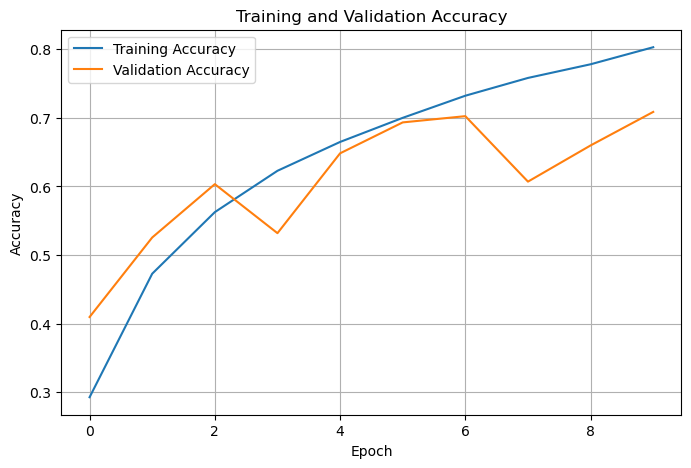

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Test model

In [26]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

313/313 [==============================] - 6s 17ms/step


#### Metrics
Accuracy, F1 score, and confusion matrix

Test Accuracy: 0.7051
Test F1 Score: 0.7075
Test Precision: 0.7353
Test Recall: 0.7051


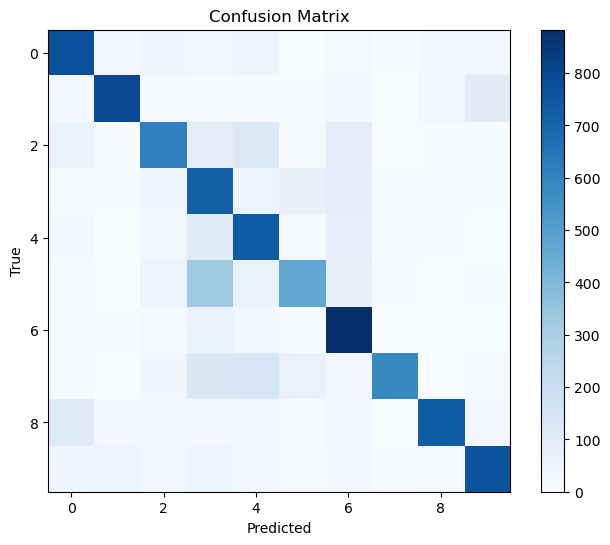

In [30]:
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
cm = confusion_matrix(y_true, y_pred)

print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()